[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


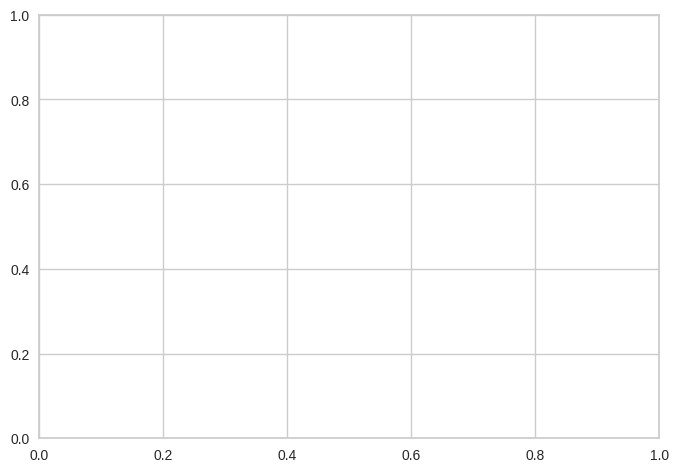

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import plotly as py
import cufflinks as cf
from plotly.offline import iplot

py.offline.init_notebook_mode(connected=True)
cf.go_offline()


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import plotly.express as px
import plotly.graph_objects as go
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import missingno as msno
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import nltk
nltk.download("punkt")
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from collections import Counter
from wordcloud import WordCloud
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score
from sklearn.metrics import precision_recall_curve, average_precision_score
from yellowbrick.classifier import PrecisionRecallCurve
import nltk
nltk.download("punkt")
nltk.download('stopwords')
nltk.download('wordnet')
# Importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly.express as px
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
# Figure&Display options
%matplotlib inline
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (12, 8)
pd.set_option('max_colwidth', 200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
#import colorama
#from colorama import Fore, Style # maakes strings colored
from termcolor import colored
import ipywidgets
from ipywidgets import interact
#import pandas_profiling
#from pandas_profiling.report.presentation.flavours.html.templates import create_html_assets


In [ ]:

df=pd.read_csv("/content/Womens Clothing E-Commerce Reviews.csv")
x=df.shape
df.head()


,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comfortable,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length...",5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i co...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1,6,General,Tops,Blouses


In [ ]:
df.shape

(23486, 11)

Unnamed 0, Clothing ID and Title column are unnecessary columns. So we can remove these columns from dataframe.

In [ ]:
df.drop(["Unnamed: 0","Clothing ID","Title"],axis=1,inplace=True)
df.head()

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,33,Absolutely wonderful - silky and sexy and comfortable,4,1,0,Initmates,Intimate,Intimates
1,34,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length...",5,1,4,General,Dresses,Dresses
2,60,I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i co...,3,0,0,General,Dresses,Dresses
3,50,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1,0,General Petite,Bottoms,Pants
4,47,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1,6,General,Tops,Blouses


In [ ]:
df.dtypes

Age                         int64
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object

Analyzing the amount of null values in each attribute and removing the null vales to reduce the size and increasing the performance.

In [ ]:
df.isnull().sum()

Age                          0
Review Text                845
Rating                       0
Recommended IND              0
Positive Feedback Count      0
Division Name               14
Department Name             14
Class Name                  14
dtype: int64

In [ ]:
df.dropna(subset=["Review Text","Division Name","Department Name","Class Name"],inplace=True)

In [ ]:
y=df.shape


In [ ]:
print("Deleted")
print(x[0]-y[0],"Rows")
print(x[1]-y[1],"Columns")

Deleted
858 Rows
3 Columns


DATA VISUALISATION

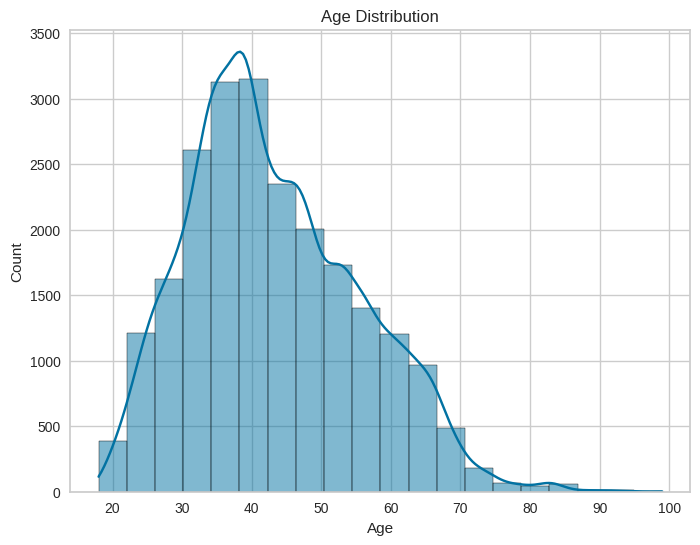

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

So most of the women are in the range of between 35 to 45.

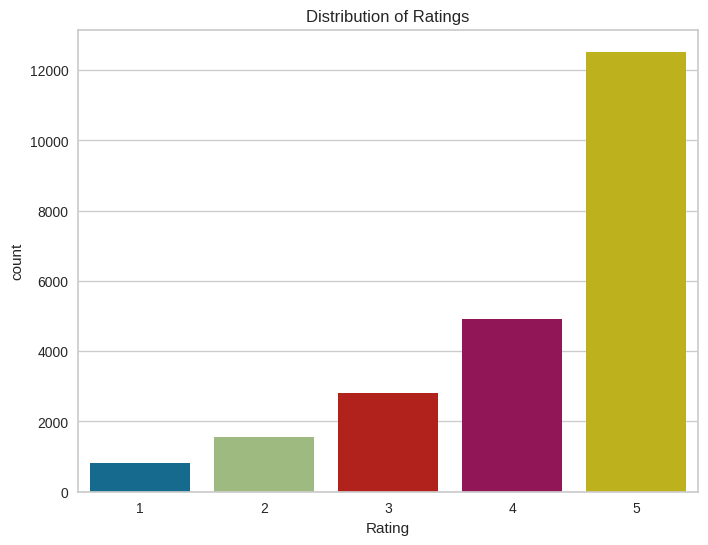

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Rating', data=df)
plt.title('Distribution of Ratings')
plt.show()

Most of them has given a maximum rating of 5

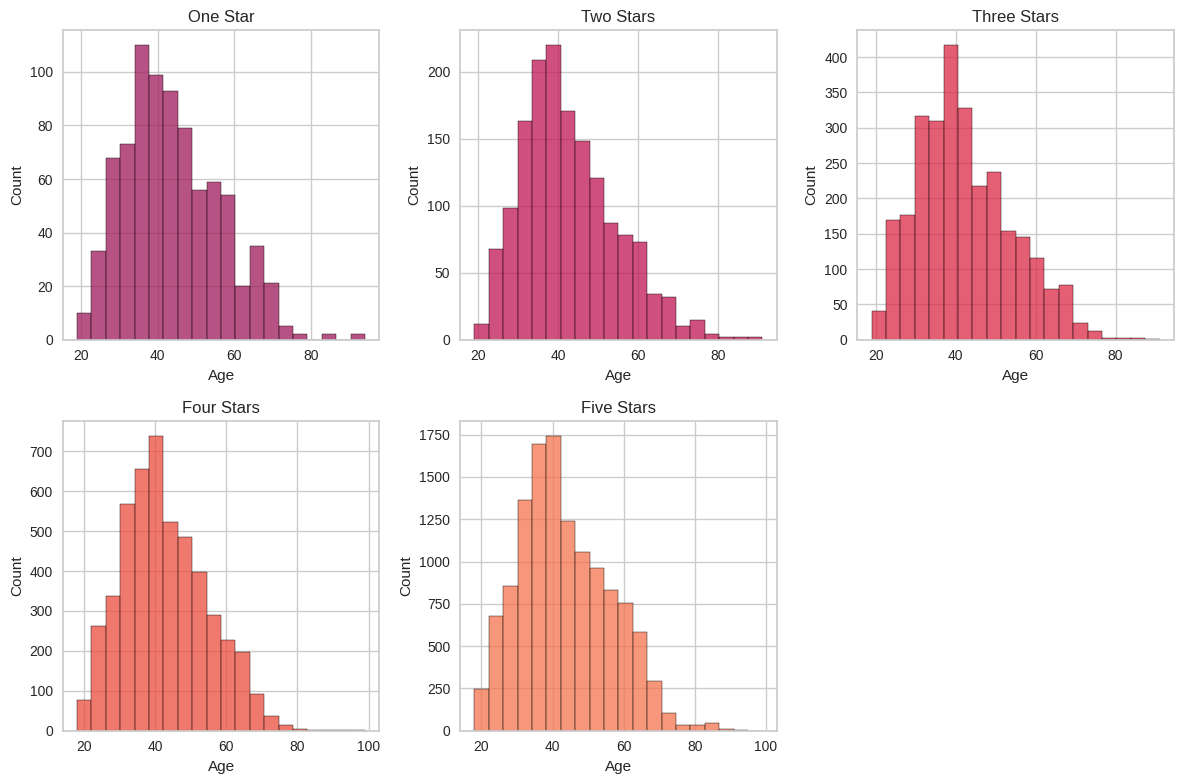

In [ ]:
rocket = plt.get_cmap("rocket")
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(12, 8))
one = df[df["Rating"] == 1]["Age"]
two = df[df["Rating"] == 2]["Age"]
three = df[df["Rating"] == 3]["Age"]
four = df[df["Rating"] == 4]["Age"]
five = df[df["Rating"] == 5]["Age"]

ax1 = sns.histplot(one, ax=axes[0][0], kde=False, bins=20, color=rocket(100))
ax1.set_title('One Star')

ax2 = sns.histplot(two, ax=axes[0][1], kde=False, bins=20, color=rocket(120))
ax2.set_title('Two Stars')

ax3 = sns.histplot(three, ax=axes[0][2], kde=False, bins=20, color=rocket(140))
ax3.set_title('Three Stars')

ax4 = sns.histplot(four, ax=axes[1][0], kde=False, bins=20, color=rocket(160))
ax4.set_title('Four Stars')

ax5 = sns.histplot(five, ax=axes[1][1], kde=False, bins=20, color=rocket(180))
ax5.set_title('Five Stars')

axes[-1, -1].axis("off")

plt.tight_layout()


So,


*   1 star has been given by women mostly at age above 30 with a count of 100+ .
*   2 star has been given by women mostly at age above 35 with a count of 200+ .
*   3 star has been given by women mostly at age nearly 40 with a count of 400+  .
*   4 star has been given by women mostly at age above 35 with a count of 700+ .
*   5 star has been given by women mostly at age above 35 with a count of 1700+ .







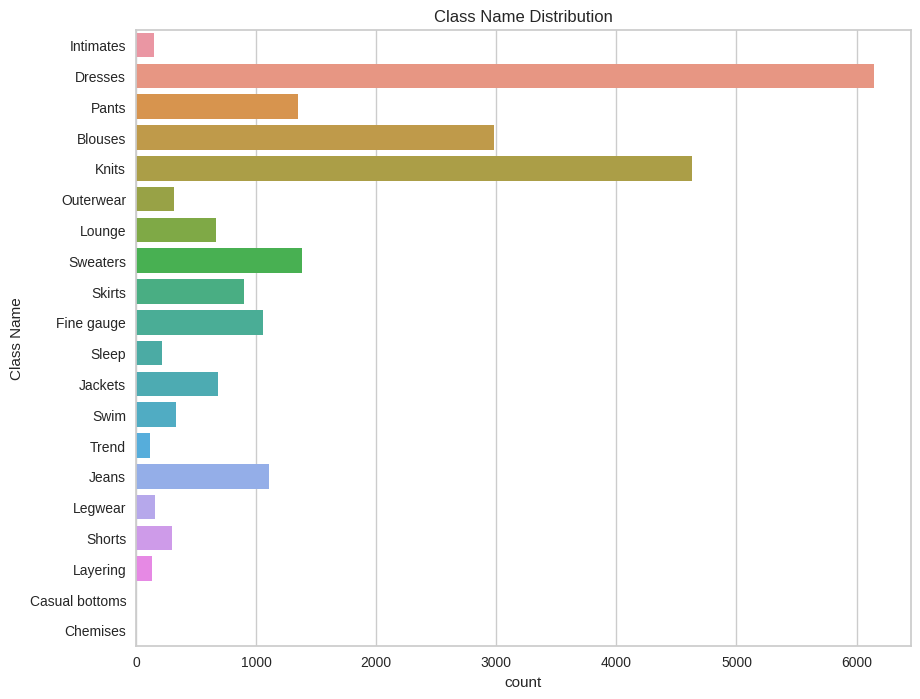

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(y='Class Name', data=df)
plt.title('Class Name Distribution')
plt.show()

So, Dresses are purchased at most followed by knits, blouses, pants, sweaters and so on.

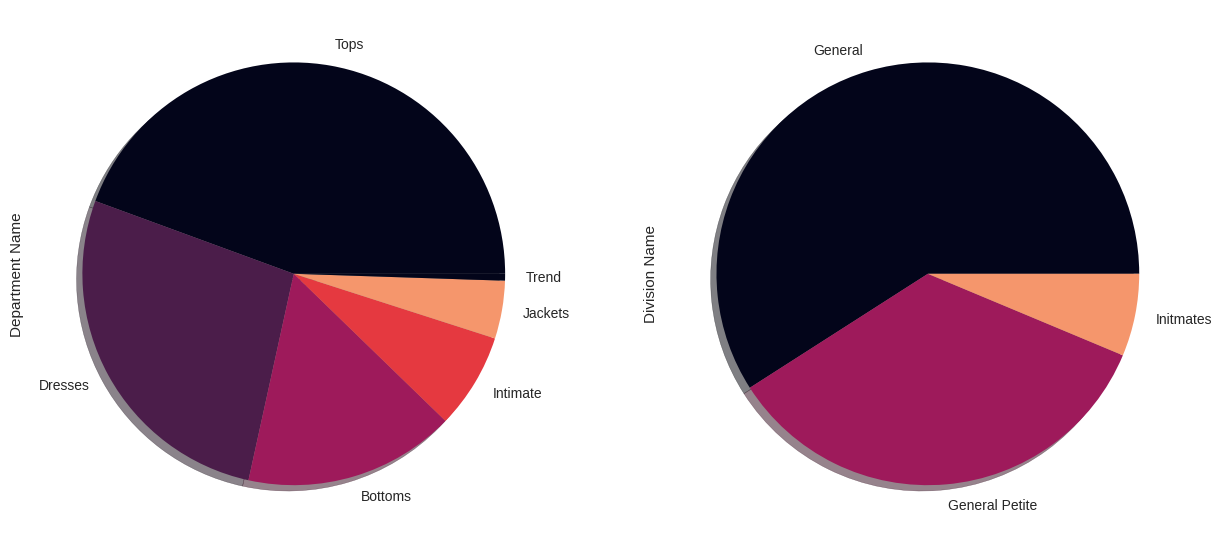

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15, 21))
ax=df["Department Name"].value_counts().plot.pie(ax = axes[0], shadow=True, colors=rocket(np.arange(5)*50))
ax1=df["Division Name"].value_counts().plot.pie(ax = axes[1], shadow=True, colors=rocket(np.arange(5)*100))



*   Based on Department, Dresses are purchased at most
*   Based on Division,  General are purchased at most.



TEXT CLEANING


1.   Tokenization and Noise Removal
               Splitting of words into n-grams/tokens is called as tokenization.
               Removal of unwanted punctuations for clear words and improved nlp performance is called as Noise Removal
2.   Lexicon Normalization
               Lexicon normalization is to prepare text data for analysis or processing by reducing it to a common and more manageable format.
               Lexicon normalization is often a preprocessing step in NLP tasks.
    





In [ ]:

def cleaning_fsa(data):

 import re
 #1. Remove Puncs
 # \w typically matches [A-Za-z0-9_]
 text = re.sub('[^\w\s]','', data)

 #2. Tokenize
 text_tokens = word_tokenize(text.lower())

 #3. Remove numbers
 tokens_without_punc = [w for w in text_tokens if w.isalpha()]

 #4. Removing Stopwords
 stop_words = stopwords.words('english')
 tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]

 #5. lemma
 text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]

 #joining
 return " ".join(text_cleaned)

In [ ]:
cleaning_fsa("Hi, This is Deepachandran..")

'hi deepachandran'

In [ ]:
df['Review Text']=df['Review Text'].apply(cleaning_fsa)

In [ ]:
df['Review Text'][0:2]

0                                                                                                                                             absolutely wonderful silky sexy comfortable
1    love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite
Name: Review Text, dtype: object

Sentiment Polarity analysis for detection of positive and negative reviews.

In [ ]:
from textblob import TextBlob
res = TextBlob("This movie is extremely amazing")
print(res.sentiment.polarity)
res=TextBlob("This movie is very boring.")
print(res.sentiment.polarity)
res=TextBlob("This movie is above average.")
print(res.sentiment.polarity)

0.6000000000000001
-1.0
-0.075


In [ ]:
df["Polarity"] = df["Review Text"].apply(lambda x: TextBlob(x).sentiment.polarity)

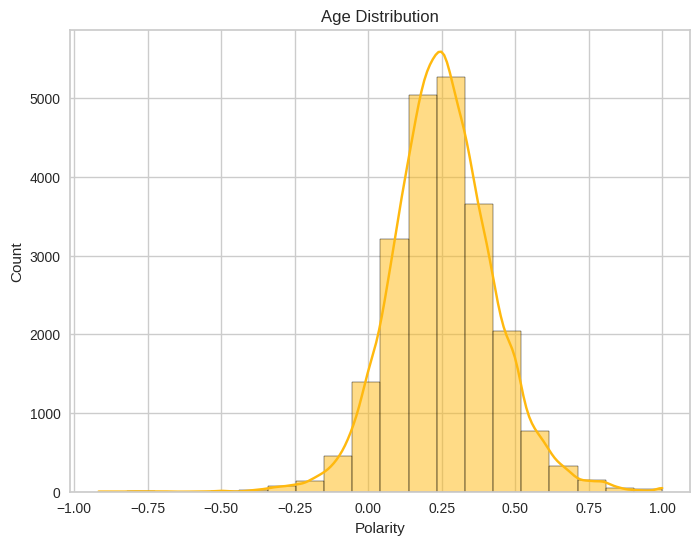

In [ ]:

plt.figure(figsize=(8, 6))
sns.histplot(df['Polarity'], bins=20, kde=True,color="#FFB90F")
plt.title('Age Distribution')
plt.show()

So , positive reviews with a polarity of 0.25 is given by most of the women with a count of 5000+

In [ ]:
df.head()

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Polarity
0,33,absolutely wonderful silky sexy comfortable,4,1,0,Initmates,Intimate,Intimates,0.63
1,34,love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite,5,1,4,General,Dresses,Dresses,0.32
2,60,high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could zip reordered petite medium ok overall top half comfortable fit nicely bottom...,3,0,0,General,Dresses,Dresses,0.08
3,50,love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment,5,1,0,General Petite,Bottoms,Pants,0.50
4,47,shirt flattering due adjustable front tie perfect length wear legging sleeveless pair well cardigan love shirt,5,1,6,General,Tops,Blouses,0.46


As per the census, When deciding whether to engage with a business, it has been indicated that 3.3 stars out of 5 are the lowest rating customers are likely to consider.

So rating greater than 3 will be considered as positive, else considered as negative.

In [ ]:
positive = (df["Rating"] >3)
negative = (df["Rating"] <= 3)
df["Review Type"] = " "
df["Review Type"][positive] = "Positive"

df["Review Type"][negative] = "Negative"

df.head()

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Polarity,Review Type
0,33,absolutely wonderful silky sexy comfortable,4,1,0,Initmates,Intimate,Intimates,0.63,Positive
1,34,love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite,5,1,4,General,Dresses,Dresses,0.32,Positive
2,60,high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could zip reordered petite medium ok overall top half comfortable fit nicely bottom...,3,0,0,General,Dresses,Dresses,0.08,Negative
3,50,love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment,5,1,0,General Petite,Bottoms,Pants,0.50,Positive
4,47,shirt flattering due adjustable front tie perfect length wear legging sleeveless pair well cardigan love shirt,5,1,6,General,Tops,Blouses,0.46,Positive


In [ ]:
review_type = {"Positive": 1, "Negative": 0}
df["Review Type"] = df["Review Type"].map(review_type)
df.head()

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Polarity,Review Type
0,33,absolutely wonderful silky sexy comfortable,4,1,0,Initmates,Intimate,Intimates,0.63,1
1,34,love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite,5,1,4,General,Dresses,Dresses,0.32,1
2,60,high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could zip reordered petite medium ok overall top half comfortable fit nicely bottom...,3,0,0,General,Dresses,Dresses,0.08,0
3,50,love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment,5,1,0,General Petite,Bottoms,Pants,0.50,1
4,47,shirt flattering due adjustable front tie perfect length wear legging sleeveless pair well cardigan love shirt,5,1,6,General,Tops,Blouses,0.46,1


Forming a new column called as NEW_Recommended Index. If review type is 1 and recommended index is also 1 then, new recommended index is also equal to 1.

In [ ]:
df['NEW_Recommended INDEX']=0
df['NEW_Recommended INDEX'][(df["Review Type"]==1) & (df["Recommended IND"]==1)]=1
df

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Polarity,Review Type,NEW_Recommended INDEX
0,33,absolutely wonderful silky sexy comfortable,4,1,0,Initmates,Intimate,Intimates,0.63,1,1
1,34,love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite,5,1,4,General,Dresses,Dresses,0.32,1,1
2,60,high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could zip reordered petite medium ok overall top half comfortable fit nicely bottom...,3,0,0,General,Dresses,Dresses,0.08,0,0
3,50,love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment,5,1,0,General Petite,Bottoms,Pants,0.50,1,1
4,47,shirt flattering due adjustable front tie perfect length wear legging sleeveless pair well cardigan love shirt,5,1,6,General,Tops,Blouses,0.46,1,1
...,...,...,...,...,...,...,...,...,...,...,...
23481,34,happy snag dress great price easy slip flattering cut color combo,5,1,0,General Petite,Dresses,Dresses,0.68,1,1
23482,48,reminds maternity clothes soft stretchy shiny material cut flattering drape nicely found one button close front looked awkward nice long sleeve maybe others ok,3,1,0,General Petite,Tops,Knits,0.19,0,0
23483,31,fit well top see never would worked im glad able try store didnt order online different fabric would great,3,0,1,General Petite,Dresses,Dresses,0.45,0,0
23484,28,bought dress wedding summer cute unfortunately fit isnt perfect medium fit waist perfectly way long big bust shoulder wanted spend money could get tailored felt like might worth side note dress de...,3,1,2,General,Dresses,Dresses,0.42,0,0


In [ ]:
len(df[df["Recommended IND"]==1])

18527

In [ ]:
len(df[df['NEW_Recommended INDEX']==1])

17248

In [ ]:
len(df[df["Recommended IND"]==0])


4101

In [ ]:

len(df[df['NEW_Recommended INDEX']==0])

5380

In [ ]:
df[(df['NEW_Recommended INDEX']==1)&(df['Recommended IND']==0)].head()

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Polarity,Review Type,NEW_Recommended INDEX


In [ ]:
df[(df['NEW_Recommended INDEX']==0)&(df['Recommended IND']==1)].head()

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Polarity,Review Type,NEW_Recommended INDEX
14,50,nice choice holiday gathering like length graz knee conservative enough office related gathering size small fit well usually size small bust opinion run small larger bust definitely size perhaps w...,3,1,1,General,Dresses,Dresses,-0.06,0,0
16,34,material color nice leg opening large length hit right ankle leg opening size waist hem line ankle front pleat make fluffy think imagine flattering look least average height taller may look good,3,1,2,General,Bottoms,Pants,0.16,0,0
23,34,cute little dress fit tt little high waisted good length height like dress im love dont think look feel cheap appears pictured,3,1,0,General,Dresses,Dresses,0.29,0,0
52,39,love color style material snag easily,3,1,3,General,Dresses,Dresses,0.47,0,0
84,37,received shirt typical x fit perfectly im crazy love also dont dislike shirt thin side need wear cami underneath concern hole remind material could develop hole wear wash said ill wash shirt cold ...,3,1,0,General Petite,Tops,Knits,-0.10,0,0


So I filtered out the negative reviews with recommendation index of 1. Hence the prediction will be better.

<Axes: >

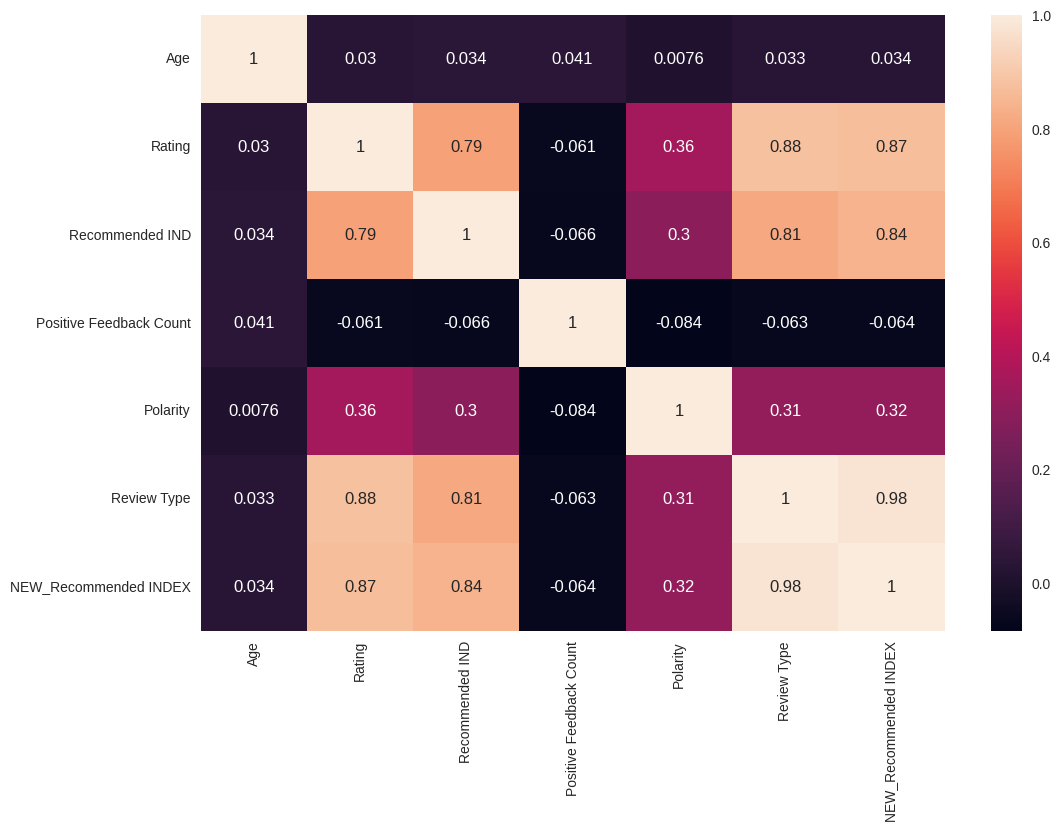

In [ ]:
cor = df.corr()
sns.heatmap(cor, xticklabels = cor.columns, yticklabels = cor.columns, annot = True)


In [ ]:
df["NEW_Recommended INDEX"].value_counts()


1    17248
0     5380
Name: NEW_Recommended INDEX, dtype: int64

As per the analysis, Some negative reviews are given with recommendation index of 1.So based on review type and recommendation index, if review type and recommendation index is equal to 1, then new recommendation index is also equal to one. Hence a better recommendation index is produced for a better prediction

ML PREDICTION

Collection of negative words

In [ ]:
neg_words = " ".join(df[df["NEW_Recommended INDEX"] == 0]['Review Text']).split()
neg_words

['high',
 'hope',
 'dress',
 'really',
 'wanted',
 'work',
 'initially',
 'ordered',
 'petite',
 'small',
 'usual',
 'size',
 'found',
 'outrageously',
 'small',
 'small',
 'fact',
 'could',
 'zip',
 'reordered',
 'petite',
 'medium',
 'ok',
 'overall',
 'top',
 'half',
 'comfortable',
 'fit',
 'nicely',
 'bottom',
 'half',
 'tight',
 'layer',
 'several',
 'somewhat',
 'cheap',
 'net',
 'layer',
 'imo',
 'major',
 'design',
 'flaw',
 'net',
 'layer',
 'sewn',
 'directly',
 'zipper',
 'c',
 'love',
 'tracy',
 'reese',
 'dress',
 'one',
 'petite',
 'foot',
 'tall',
 'usually',
 'wear',
 'brand',
 'dress',
 'pretty',
 'package',
 'lot',
 'dress',
 'skirt',
 'long',
 'full',
 'overwhelmed',
 'small',
 'frame',
 'stranger',
 'alteration',
 'shortening',
 'narrowing',
 'skirt',
 'would',
 'take',
 'away',
 'embellishment',
 'garment',
 'love',
 'color',
 'idea',
 'style',
 'work',
 'returned',
 'dress',
 'dress',
 'run',
 'small',
 'esp',
 'zipper',
 'area',
 'run',
 'ordered',
 'sp',
 'typi

Collection of Positive Words

In [ ]:
from pandas.core.arrays.base import PositionalIndexer
pos_words = " ".join(df[df["NEW_Recommended INDEX"] == 1]['Review Text']).split()
pos_words

['absolutely',
 'wonderful',
 'silky',
 'sexy',
 'comfortable',
 'love',
 'dress',
 'sooo',
 'pretty',
 'happened',
 'find',
 'store',
 'im',
 'glad',
 'bc',
 'never',
 'would',
 'ordered',
 'online',
 'bc',
 'petite',
 'bought',
 'petite',
 'love',
 'length',
 'hit',
 'little',
 'knee',
 'would',
 'definitely',
 'true',
 'midi',
 'someone',
 'truly',
 'petite',
 'love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'flirty',
 'fabulous',
 'every',
 'time',
 'wear',
 'get',
 'nothing',
 'great',
 'compliment',
 'shirt',
 'flattering',
 'due',
 'adjustable',
 'front',
 'tie',
 'perfect',
 'length',
 'wear',
 'legging',
 'sleeveless',
 'pair',
 'well',
 'cardigan',
 'love',
 'shirt',
 'aded',
 'basket',
 'hte',
 'last',
 'mintue',
 'see',
 'would',
 'look',
 'like',
 'person',
 'store',
 'pick',
 'went',
 'teh',
 'darkler',
 'color',
 'pale',
 'hte',
 'color',
 'really',
 'gorgeous',
 'turn',
 'mathced',
 'everythiing',
 'trying',
 'prefectly',
 'little',
 'baggy',
 'hte',
 'x',
 'hte',
 'msal

In [ ]:
all_words=" ".join(df["Review Text"])
all_words[:100]


'absolutely wonderful silky sexy comfortable love dress sooo pretty happened find store im glad bc ne'

Analysis of postive and negative words with highest frequency using wordcloud

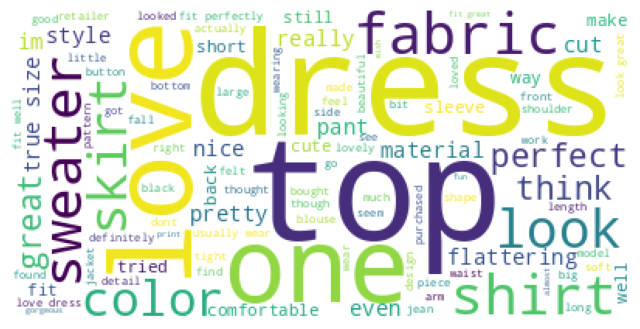

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white", max_words =100).generate(all_words)
plt.figure(figsize = (8, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

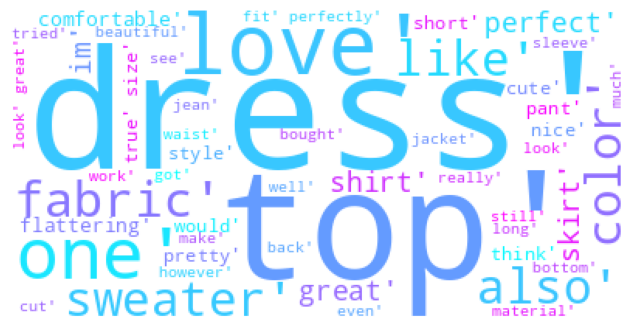

In [ ]:
wordcloud = WordCloud(background_color="white", max_words =50, colormap='cool').generate(str(pos_words))
plt.figure(figsize = (8, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

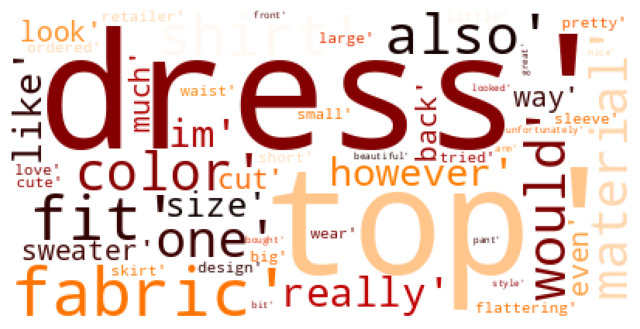

In [ ]:
wordcloud = WordCloud(background_color="white", max_words =50, colormap='gist_heat').generate(str(neg_words))
plt.figure(figsize = (8, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


ML PREDICTION

In [ ]:

from sklearn.model_selection import train_test_split


In [ ]:
X = df["Review Text"]
y= df["NEW_Recommended INDEX"]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)


Count Vectorization

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [ ]:
print(X_train_count)

  (0, 4271)	1
  (0, 8709)	1
  (0, 13256)	4
  (0, 6100)	1
  (0, 12723)	1
  (0, 5247)	1
  (0, 5071)	1
  (0, 7065)	2
  (0, 818)	1
  (0, 14330)	1
  (0, 2820)	1
  (0, 7067)	1
  (0, 12363)	1
  (0, 3339)	1
  (0, 9221)	1
  (0, 8871)	1
  (0, 626)	1
  (0, 3497)	1
  (0, 7548)	1
  (0, 6197)	1
  (0, 12991)	1
  (0, 10942)	1
  (0, 13048)	1
  (0, 4380)	1
  (0, 8255)	1
  :	:
  (18100, 9839)	1
  (18100, 10130)	1
  (18100, 5025)	1
  (18100, 7498)	1
  (18100, 14219)	2
  (18100, 9981)	1
  (18100, 12767)	1
  (18100, 10854)	1
  (18100, 6599)	1
  (18100, 14347)	1
  (18101, 13256)	1
  (18101, 4551)	1
  (18101, 7220)	1
  (18101, 11451)	1
  (18101, 11658)	1
  (18101, 14643)	1
  (18101, 3027)	1
  (18101, 10812)	1
  (18101, 9737)	1
  (18101, 4168)	1
  (18101, 11132)	1
  (18101, 4479)	1
  (18101, 3264)	1
  (18101, 6468)	1
  (18101, 13294)	1


TF-IDF Vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_vectorizer = TfidfVectorizer()
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report, f1_score, recall_score, accuracy_score, precision_score

In [ ]:
def eval(model, X_train, X_test):
  y_pred = model.predict(X_test)
  y_pred_train = model.predict(X_train)
  print("Test_Set")
  print(classification_report(y_test, y_pred))
  print("Train_Set")
  print(classification_report(y_train, y_pred_train))
  #fig, ax = plt.subplots(figsize=(8, 8))
  cm=confusion_matrix(y_test,y_pred)
  disp=ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot()


# Logistic Regression

Count-Vectorizer

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(C =0.6, max_iter=1000, class_weight= "balanced", random_state=101)
log.fit(X_train_count,y_train)


LogisticRegression(C=0.6, class_weight='balanced', max_iter=1000,
                   random_state=101)

LOG MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.67      0.79      0.73      1076
           1       0.93      0.88      0.90      3450

    accuracy                           0.86      4526
   macro avg       0.80      0.84      0.82      4526
weighted avg       0.87      0.86      0.86      4526

Train_Set
              precision    recall  f1-score   support

           0       0.80      0.95      0.87      4304
           1       0.98      0.93      0.95     13798

    accuracy                           0.93     18102
   macro avg       0.89      0.94      0.91     18102
weighted avg       0.94      0.93      0.93     18102



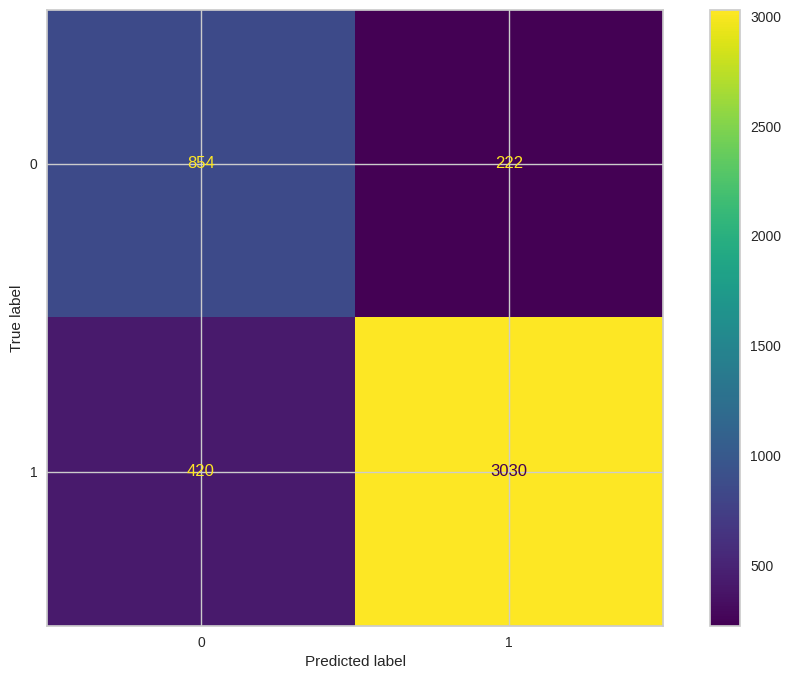

In [ ]:
print("LOG MODEL")
eval(log, X_train_count, X_test_count)


In [ ]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
custom_scorer = {'accuracy': make_scorer(accuracy_score),
 'precision-0': make_scorer(precision_score, pos_label=0),
 'recall-0': make_scorer(recall_score, pos_label=0),
 'f1-0': make_scorer(f1_score, pos_label=0),
 'precision-1': make_scorer(precision_score, pos_label=1),
 'recall-1': make_scorer(recall_score, pos_label=1),
 'f1-1': make_scorer(f1_score, pos_label=1)
 }

for i, j in custom_scorer.items():
  model = LogisticRegression(C =0.6, max_iter=1000, class_weight= "balanced", random_state=101)
  scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
  if i == "recall-1":
    log_count_rec = scores
  elif i == "f1-1":
    log_count_f1 = scores
  elif i == "accuracy":
    log_count_acc = scores
  print(f" {i:20} score for count : {scores}\n")


 accuracy             score for count : 0.8626669127584344

 precision-0          score for count : 0.6790274664428848

 recall-0             score for count : 0.8020460799654672

 f1-0                 score for count : 0.735286989673563

 precision-1          score for count : 0.9345675176398783

 recall-1             score for count : 0.8815772824247775

 f1-1                 score for count : 0.9072730108168331



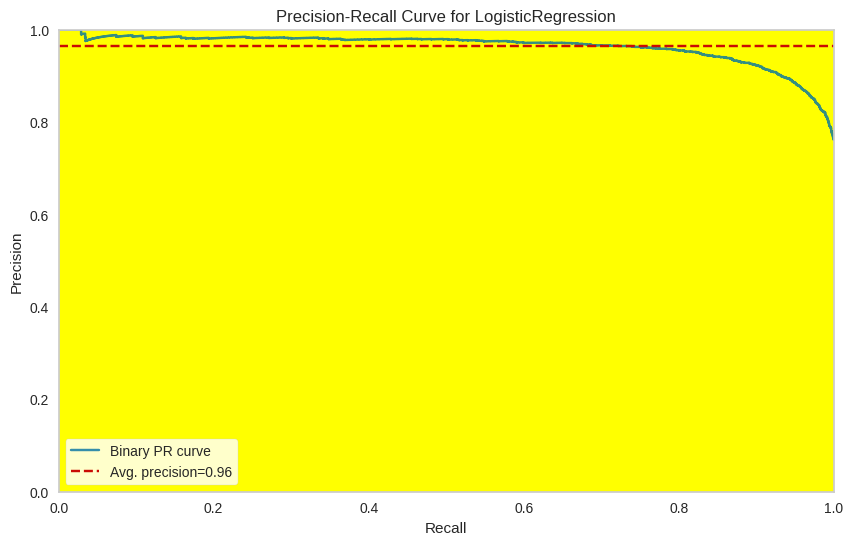

In [ ]:

from yellowbrick.classifier import PrecisionRecallCurve
viz = PrecisionRecallCurve(
 LogisticRegression(C =0.6, max_iter=1000, class_weight= "balanced", random_state=101),
 classes=log.classes_,
 per_class=True,
cmap="Set1"
 )
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('yellow')
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();


In [ ]:
log_AP_count = viz.score_

TF-IDF Vectorizer

In [ ]:

log = LogisticRegression(C=0.1, max_iter=1000, random_state=101, class_weight="balanced")
log.fit(X_train_tf_idf,y_train)

LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000,
                   random_state=101)

LOG MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.62      0.83      0.71      1076
           1       0.94      0.84      0.89      3450

    accuracy                           0.84      4526
   macro avg       0.78      0.84      0.80      4526
weighted avg       0.86      0.84      0.85      4526

Train_Set
              precision    recall  f1-score   support

           0       0.65      0.88      0.75      4304
           1       0.96      0.85      0.90     13798

    accuracy                           0.86     18102
   macro avg       0.80      0.86      0.82     18102
weighted avg       0.88      0.86      0.86     18102



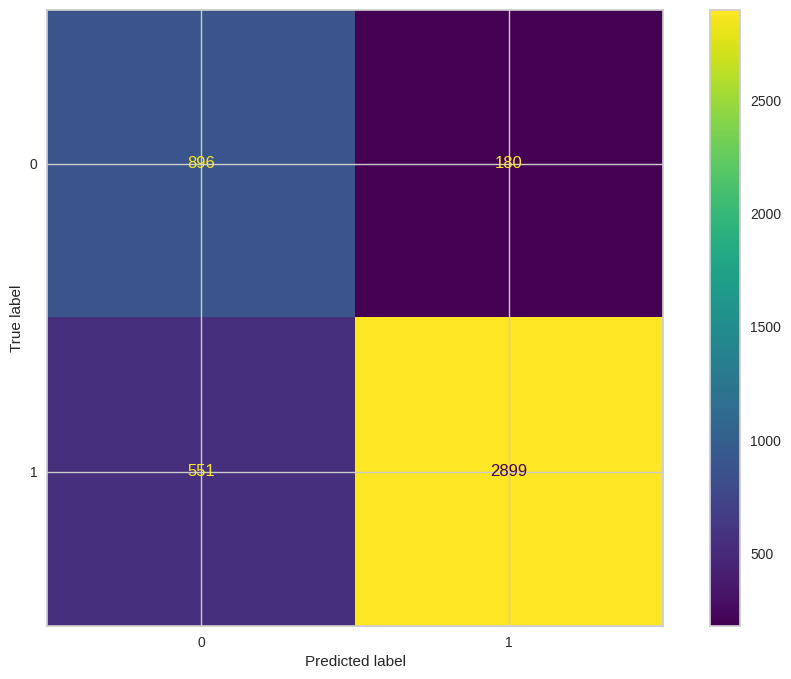

In [ ]:
print("LOG MODEL")
eval(log, X_train_tf_idf, X_test_tf_idf)

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
custom_scorer = {'accuracy': make_scorer(accuracy_score),
 'precision-0': make_scorer(precision_score, pos_label=0),
 'recall-0': make_scorer(recall_score, pos_label=0),
 'f1-0': make_scorer(f1_score, pos_label=0),
 'precision-1': make_scorer(precision_score, pos_label=1),
 'recall-1': make_scorer(recall_score, pos_label=1),
 'f1-1': make_scorer(f1_score, pos_label=1)
 }

for i, j in custom_scorer.items():
  model = LogisticRegression(C =0.6, max_iter=1000, class_weight= "balanced", random_state=101)
  scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
  if i == "recall-1":
    log_count_rec = scores
  elif i == "f1-1":
    log_count_f1 = scores
  elif i == "accuracy":
    log_count_acc = scores
  print(f" {i:20} score for count : {scores}\n")

 accuracy             score for count : 0.8568112913411291

 precision-0          score for count : 0.6550049078173507

 recall-0             score for count : 0.8417789888307343

 f1-0                 score for count : 0.7365932616341785

 precision-1          score for count : 0.945844997570003

 recall-1             score for count : 0.8615012453889082

 f1-1                 score for count : 0.9016705585272383



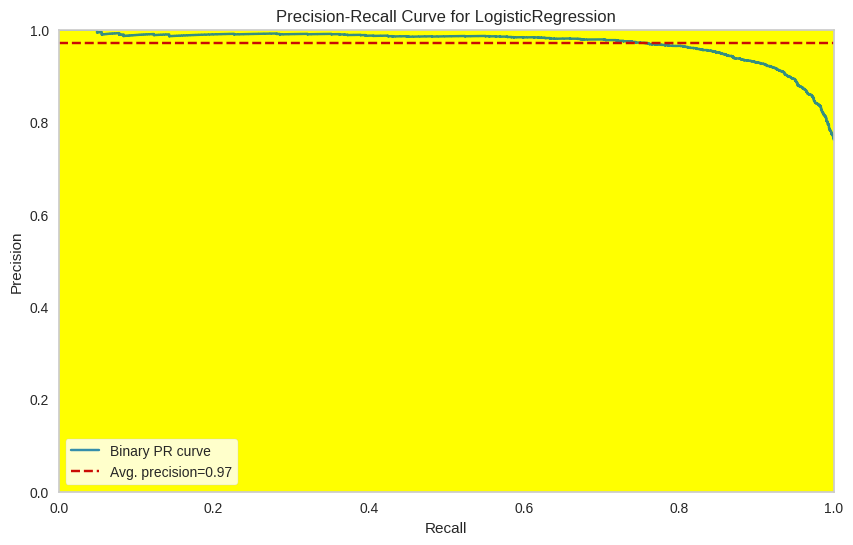

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve
viz = PrecisionRecallCurve(
 LogisticRegression(C =0.6, max_iter=1000, class_weight= "balanced", random_state=101),
 classes=log.classes_,
 per_class=True,
cmap="Set1"
 )
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('yellow')
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();


In [ ]:
log_AP_tfidf = viz.score_


# NAIVE BAYES

COUNT VECTORIZER

In [ ]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

In [ ]:
nb = MultinomialNB()
nb.fit(X_train_count, y_train)

MultinomialNB()

NB MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.78      0.69      0.73      1076
           1       0.91      0.94      0.92      3450

    accuracy                           0.88      4526
   macro avg       0.84      0.81      0.83      4526
weighted avg       0.87      0.88      0.88      4526

Train_Set
              precision    recall  f1-score   support

           0       0.81      0.80      0.80      4304
           1       0.94      0.94      0.94     13798

    accuracy                           0.91     18102
   macro avg       0.87      0.87      0.87     18102
weighted avg       0.91      0.91      0.91     18102



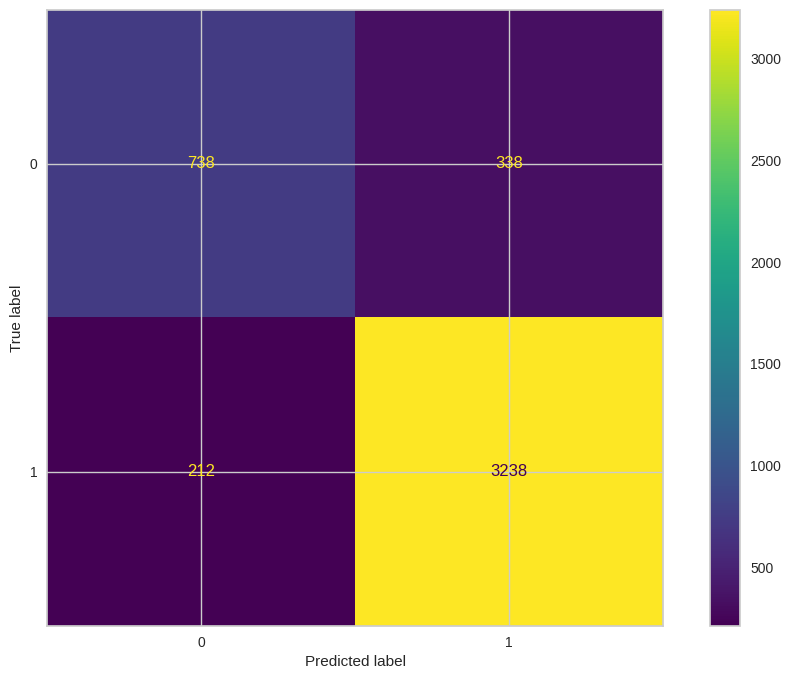

In [ ]:
print("NB MODEL")
eval(nb, X_train_count, X_test_count)

In [ ]:

custom_scorer = {'accuracy': make_scorer(accuracy_score),
 'precision-0': make_scorer(precision_score, pos_label=0),
 'recall-0': make_scorer(recall_score, pos_label=0),
 'f1-0': make_scorer(f1_score, pos_label=0),
 'precision-1': make_scorer(precision_score, pos_label=1),
 'recall-1': make_scorer(recall_score, pos_label=1),
 'f1-1': make_scorer(f1_score, pos_label=1)
 }
for i, j in custom_scorer.items():
  model = MultinomialNB()
  scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
  if i == "recall-1":
    nb_count_rec = scores
  elif i == "f1-1":
    nb_count_f1 = scores
  elif i == "accuracy":
    nb_count_acc = scores
  print(f" {i:20} score for count : {scores}\n")


 accuracy             score for count : 0.8724449420514901

 precision-0          score for count : 0.7383609103901524

 recall-0             score for count : 0.7181735283008688

 f1-0                 score for count : 0.7279198125258902

 precision-1          score for count : 0.9128829101599084

 recall-1             score for count : 0.9205675715441771

 f1-1                 score for count : 0.9166860714332111



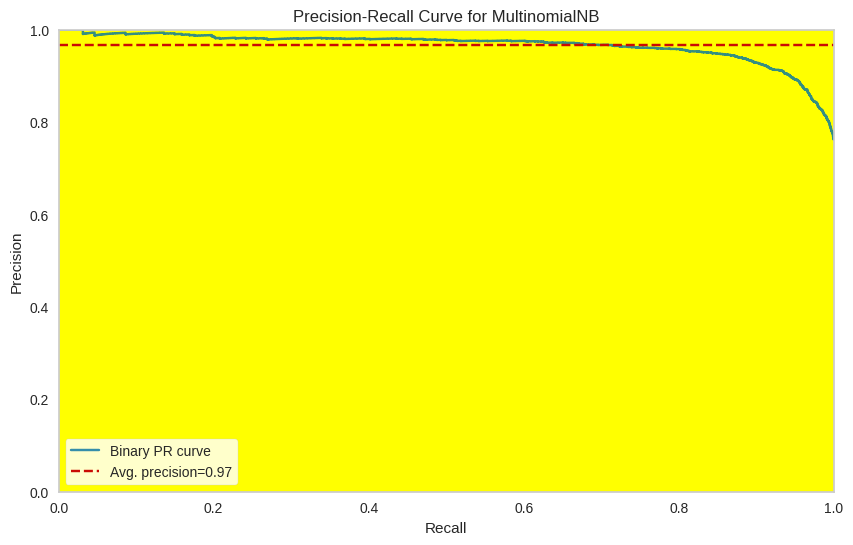

In [ ]:
viz = PrecisionRecallCurve(
 MultinomialNB(),
classes=nb.classes_,
 per_class=True,
cmap="Set1"
 )
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('yellow')
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [ ]:
nb_AP_count = viz.score

TF-IDF Vectorizer

In [ ]:

from sklearn.naive_bayes import MultinomialNB, BernoulliNB
nb = MultinomialNB()
nb.fit(X_train_tf_idf, y_train)


MultinomialNB()

NB MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.08      0.15      1076
           1       0.78      1.00      0.87      3450

    accuracy                           0.78      4526
   macro avg       0.87      0.54      0.51      4526
weighted avg       0.82      0.78      0.70      4526

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.18      0.30      4304
           1       0.80      1.00      0.89     13798

    accuracy                           0.80     18102
   macro avg       0.89      0.59      0.59     18102
weighted avg       0.84      0.80      0.75     18102



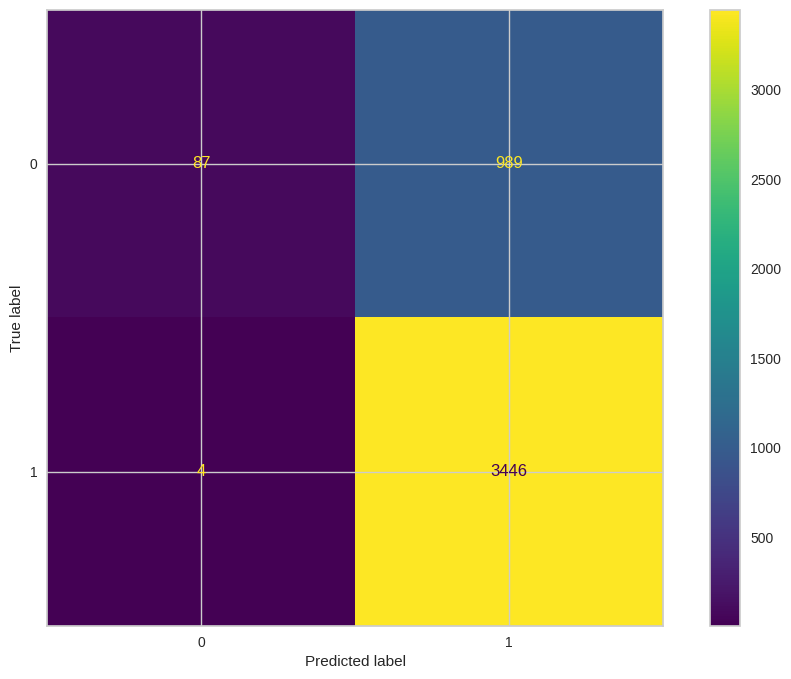

In [ ]:

print("NB MODEL")
eval(nb, X_train_tf_idf, X_test_tf_idf)

In [ ]:

custom_scorer = {'accuracy': make_scorer(accuracy_score),
 'precision-0': make_scorer(precision_score, pos_label=0),
 'recall-0': make_scorer(recall_score, pos_label=0),
 'f1-0': make_scorer(f1_score, pos_label=0),
 'precision-1': make_scorer(precision_score, pos_label=1),
 'recall-1': make_scorer(recall_score, pos_label=1),
 'f1-1': make_scorer(f1_score, pos_label=1)
 }
for i, j in custom_scorer.items():
  model = BernoulliNB()
  scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
  if i == "recall-1":
    nb_tfidf_rec = scores
  elif i == "f1-1":
    nb_tfidf_f1 = scores
  elif i == "accuracy":
    nb_tfidf_acc = scores
  print(f" {i:20} score for tfidf : {scores}\n")


 accuracy             score for tfidf : 0.8560376276346817

 precision-0          score for tfidf : 0.7167091734887704

 recall-0             score for tfidf : 0.652875951006313

 f1-0                 score for tfidf : 0.6832173431507933

 precision-1          score for tfidf : 0.8946456813397929

 recall-1             score for tfidf : 0.9194079936101565

 f1-1                 score for tfidf : 0.9068490620518196



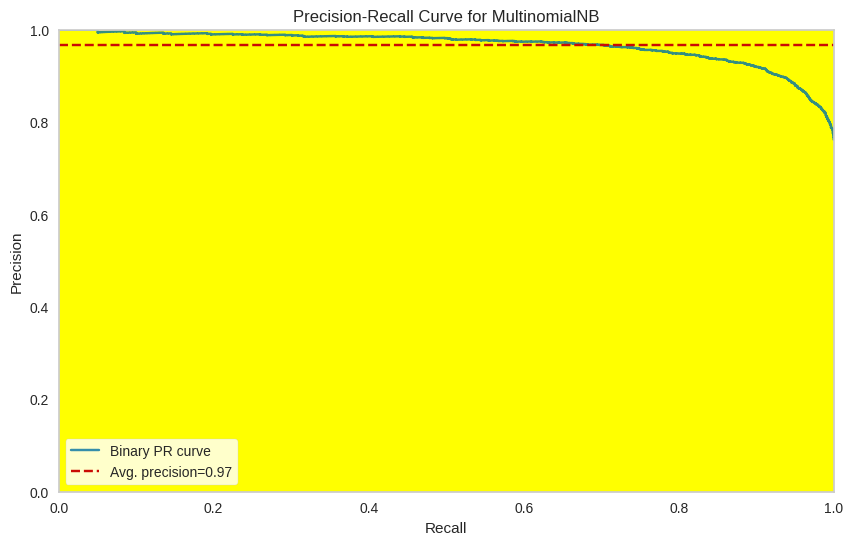

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve
viz = PrecisionRecallCurve(
 MultinomialNB(),
classes=nb.classes_,
 per_class=True,
cmap="Set1"
 )
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('yellow')
viz.fit(X_train_tf_idf, y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();


# SVM

COUNT VECTORIZER

In [ ]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=0.01, class_weight="balanced", random_state=101)
svc.fit(X_train_count,y_train)

LinearSVC(C=0.01, class_weight='balanced', random_state=101)

SVC MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.67      0.82      0.74      1076
           1       0.94      0.87      0.91      3450

    accuracy                           0.86      4526
   macro avg       0.80      0.85      0.82      4526
weighted avg       0.88      0.86      0.87      4526

Train_Set
              precision    recall  f1-score   support

           0       0.73      0.91      0.81      4304
           1       0.97      0.89      0.93     13798

    accuracy                           0.90     18102
   macro avg       0.85      0.90      0.87     18102
weighted avg       0.91      0.90      0.90     18102



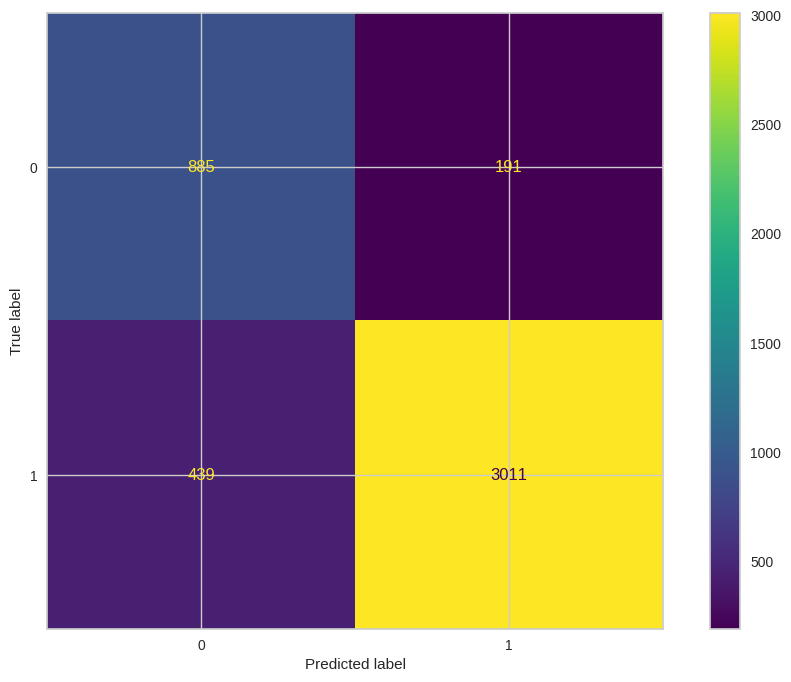

In [ ]:
print("SVC MODEL")
eval(svc, X_train_count, X_test_count)


In [ ]:

custom_scorer = {'accuracy': make_scorer(accuracy_score),
 'precision-0': make_scorer(precision_score, pos_label=0),
 'recall-0': make_scorer(recall_score, pos_label=0),
 'f1-0': make_scorer(f1_score, pos_label=0),
 'precision-1': make_scorer(precision_score, pos_label=1),
 'recall-1': make_scorer(recall_score, pos_label=1),
 'f1-1': make_scorer(f1_score, pos_label=1)
 }
for i, j in custom_scorer.items():
  model = LinearSVC(C=0.01, class_weight="balanced", random_state=101)
  scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
  if i == "recall-1":
    svc_count_rec = scores
  elif i == "f1-1":
    svc_count_f1 = scores
  elif i == "accuracy":
    svc_count_acc = scores
  print(f" {i:20} score for count : {scores}\n")

 accuracy             score for count : 0.8596837314020214

 precision-0          score for count : 0.6661899058408856

 recall-0             score for count : 0.8227216316840231

 f1-0                 score for count : 0.7360617984131095

 precision-1          score for count : 0.9403526777871045

 recall-1             score for count : 0.871213124402266

 f1-1                 score for count : 0.9044279223822722



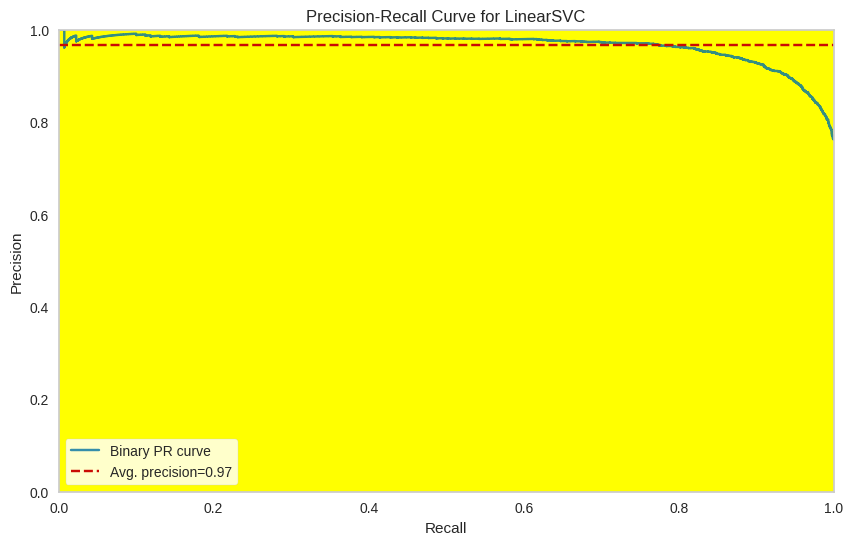

In [ ]:
viz = PrecisionRecallCurve(
 LinearSVC(C=0.01, class_weight="balanced", random_state=101),
 classes=svc.classes_,
 per_class=True,
cmap="Set1"
 )
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('yellow')
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [ ]:
svc_AP_count = viz.score

TF-IDF VECTORIZER

In [ ]:

svc = LinearSVC(C=0.01, class_weight="balanced", random_state=101)
svc.fit(X_train_tf_idf, y_train)


LinearSVC(C=0.01, class_weight='balanced', random_state=101)

SVC MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.62      0.84      0.71      1076
           1       0.94      0.84      0.89      3450

    accuracy                           0.84      4526
   macro avg       0.78      0.84      0.80      4526
weighted avg       0.87      0.84      0.85      4526

Train_Set
              precision    recall  f1-score   support

           0       0.65      0.88      0.74      4304
           1       0.96      0.85      0.90     13798

    accuracy                           0.86     18102
   macro avg       0.80      0.86      0.82     18102
weighted avg       0.88      0.86      0.86     18102



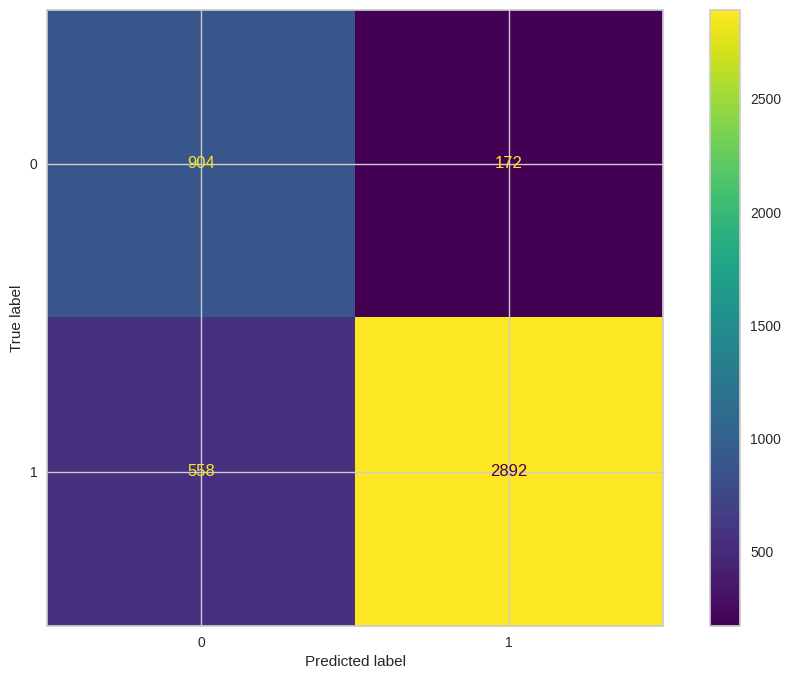

In [ ]:

print("SVC MODEL")
eval(svc, X_train_tf_idf, X_test_tf_idf)

In [ ]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
 'precision-0': make_scorer(precision_score, pos_label=0),
 'recall-0': make_scorer(recall_score, pos_label=0),
 'f1-0': make_scorer(f1_score, pos_label=0),
 'precision-1': make_scorer(precision_score, pos_label=1),
 'recall-1': make_scorer(recall_score, pos_label=1),
 'f1-1': make_scorer(f1_score, pos_label=1)
 }
for i, j in custom_scorer.items():
  model = LinearSVC(C=0.01, class_weight="balanced", random_state=101)
  scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
  if i == "recall-1":
    svc_tfidf_rec = scores
  elif i == "f1-1":
    svc_tfidf_f1 = scores
  elif i == "accuracy":
    svc_tfidf_acc = scores
  print(f" {i:20} score for tfidf : {scores}\n")


 accuracy             score for tfidf : 0.8422823384412629

 precision-0          score for tfidf : 0.623076724854362

 recall-0             score for tfidf : 0.8531597690605948

 f1-0                 score for tfidf : 0.720108832365205

 precision-1          score for tfidf : 0.9482446531485806

 recall-1             score for tfidf : 0.8388891866612017

 f1-1                 score for tfidf : 0.890198339143233



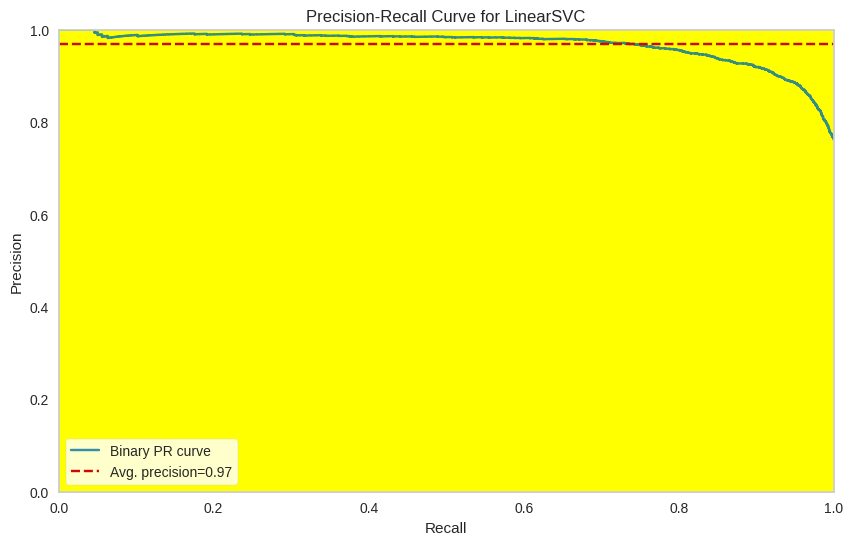

In [ ]:

viz = PrecisionRecallCurve(
 LinearSVC(C=0.01, class_weight="balanced", random_state=101),
 classes=svc.classes_,
 per_class=True,
cmap="Set1"
 )
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('yellow')
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [ ]:
svc_AP_tfidf = viz.score_


# RANDOM FOREST

COUNT VECTORIZER

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(200, max_depth = 12, random_state = 42, n_jobs = -1, class_weight="balanced")
rf.fit(X_train_count, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=12, n_estimators=200,
                       n_jobs=-1, random_state=42)

RF MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.63      0.78      0.69      1076
           1       0.93      0.85      0.89      3450

    accuracy                           0.84      4526
   macro avg       0.78      0.82      0.79      4526
weighted avg       0.85      0.84      0.84      4526

Train_Set
              precision    recall  f1-score   support

           0       0.71      0.88      0.78      4304
           1       0.96      0.89      0.92     13798

    accuracy                           0.89     18102
   macro avg       0.83      0.88      0.85     18102
weighted avg       0.90      0.89      0.89     18102



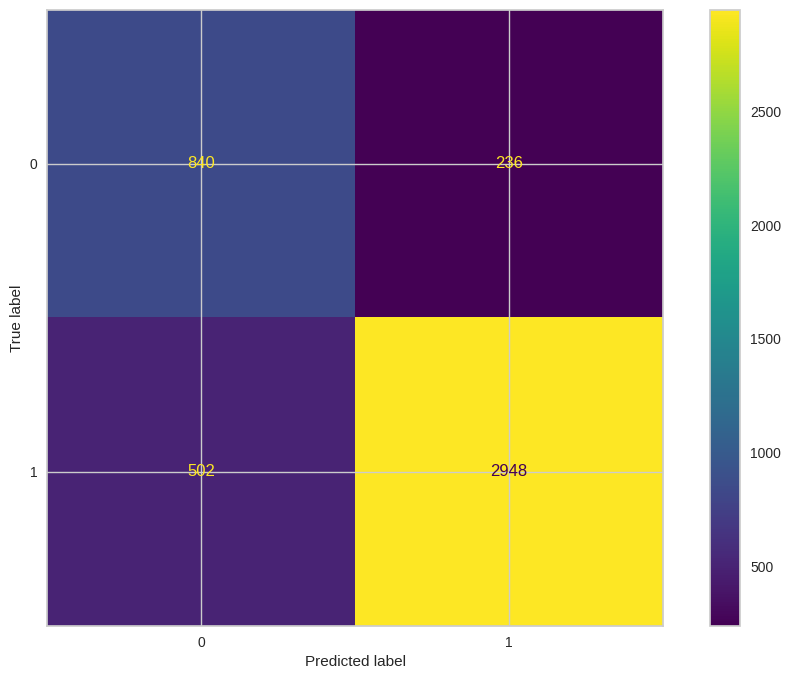

In [ ]:
print("RF MODEL")
eval(rf, X_train_count, X_test_count)

In [ ]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
 'precision-0': make_scorer(precision_score, pos_label=0),
 'recall-0': make_scorer(recall_score, pos_label=0),
 'f1-0': make_scorer(f1_score, pos_label=0),
 'precision-1': make_scorer(precision_score, pos_label=1),
 'recall-1': make_scorer(recall_score, pos_label=1),
 'f1-1': make_scorer(f1_score, pos_label=1)
 }
for i, j in custom_scorer.items():
  model = RandomForestClassifier(200, max_depth = 12, random_state = 42, n_jobs = -1, class_weight="balanced")
  scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
  if i == "recall-1":
    rf_count_rec = scores
  elif i == "f1-1":
    rf_count_f1 = scores
  elif i == "accuracy":
    rf_count_acc= scores
  print(f" {i:20} score for count : {scores}\n")


 accuracy             score for count : 0.845817578884106

 precision-0          score for count : 0.6417332768113755

 recall-0             score for count : 0.796690767819565

 f1-0                 score for count : 0.7107163016895301

 precision-1          score for count : 0.9314574592185604

 recall-1             score for count : 0.8611378230391693

 f1-1                 score for count : 0.8948868278364118



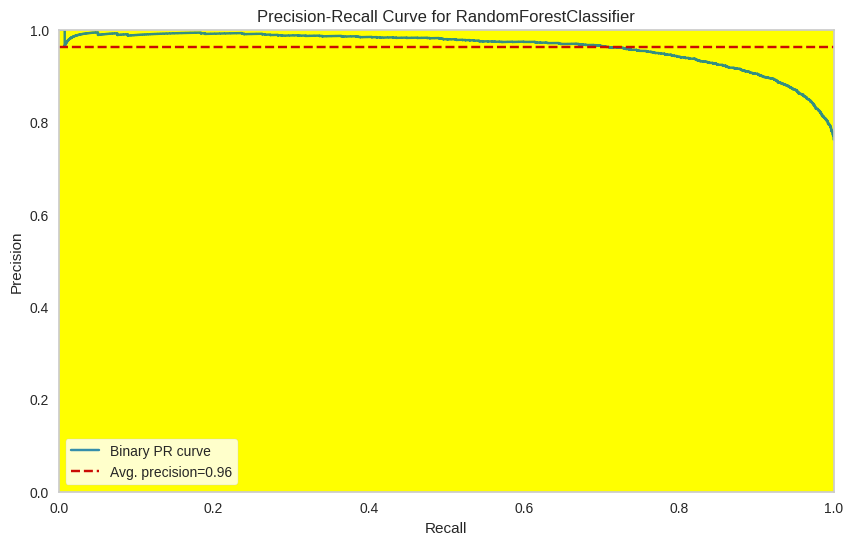

In [ ]:

viz = PrecisionRecallCurve(
    RandomForestClassifier(200, max_depth = 10, random_state = 42, n_jobs = -1, class_weight="balanced"),
 classes=rf.classes_,
 per_class=True,
cmap="Set1"
 )
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('yellow')
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [ ]:

rf_AP_count = viz.score_



TF-IDF Vectorizer

In [ ]:
rf = RandomForestClassifier(200, max_depth = 10, random_state = 42, n_jobs = -1, class_weight="balanced")
rf.fit(X_train_tf_idf, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=200,
                       n_jobs=-1, random_state=42)

RF MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.61      0.80      0.70      1076
           1       0.93      0.84      0.89      3450

    accuracy                           0.83      4526
   macro avg       0.77      0.82      0.79      4526
weighted avg       0.86      0.83      0.84      4526

Train_Set
              precision    recall  f1-score   support

           0       0.66      0.90      0.76      4304
           1       0.96      0.86      0.91     13798

    accuracy                           0.87     18102
   macro avg       0.81      0.88      0.83     18102
weighted avg       0.89      0.87      0.87     18102



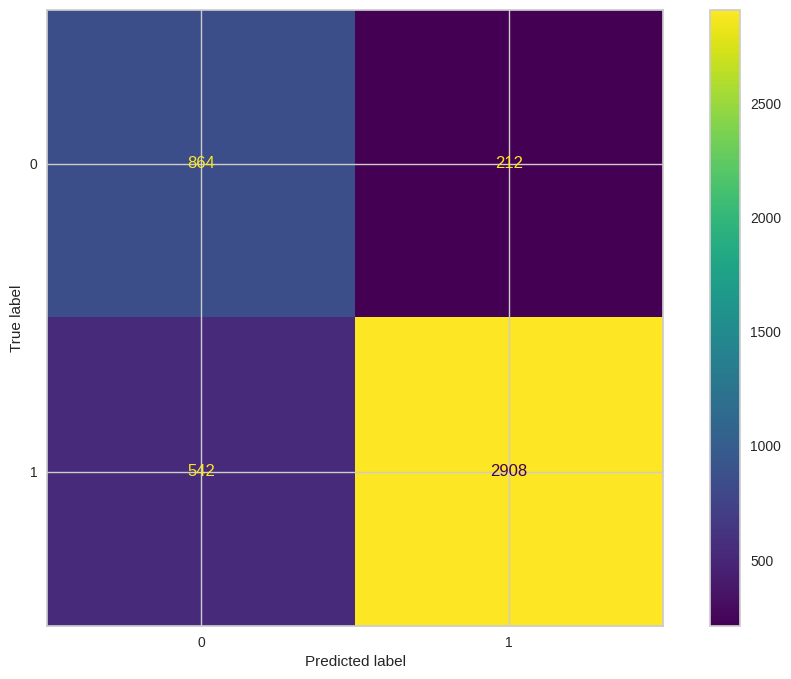

In [ ]:
print("RF MODEL")
eval(rf, X_train_tf_idf, X_test_tf_idf)

In [ ]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
 'precision-0': make_scorer(precision_score, pos_label=0),
 'recall-0': make_scorer(recall_score, pos_label=0),
 'f1-0': make_scorer(f1_score, pos_label=0),
 'precision-1': make_scorer(precision_score, pos_label=1),
 'recall-1': make_scorer(recall_score, pos_label=1),
 'f1-1': make_scorer(f1_score, pos_label=1)
 }
for i, j in custom_scorer.items():
  model = RandomForestClassifier(200, max_depth = 10, random_state = 42, n_jobs = -1, class_weight="balanced")
  scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
  if i == "recall-1":
    rf_tfidf_rec = scores
  elif i == "f1-1":
    rf_tfidf_f1 = scores
  elif i == "accuracy":
    rf_tfidf_acc = scores
  print(f" {i:20} score for tfidf : {scores}\n")


 accuracy             score for tfidf : 0.8305151758285005

 precision-0          score for tfidf : 0.6105539647110793

 recall-0             score for tfidf : 0.7941423406895807

 f1-0                 score for tfidf : 0.6902946091913892

 precision-1          score for tfidf : 0.9291267702659569

 recall-1             score for tfidf : 0.8418593603850721

 f1-1                 score for tfidf : 0.8833280550753455



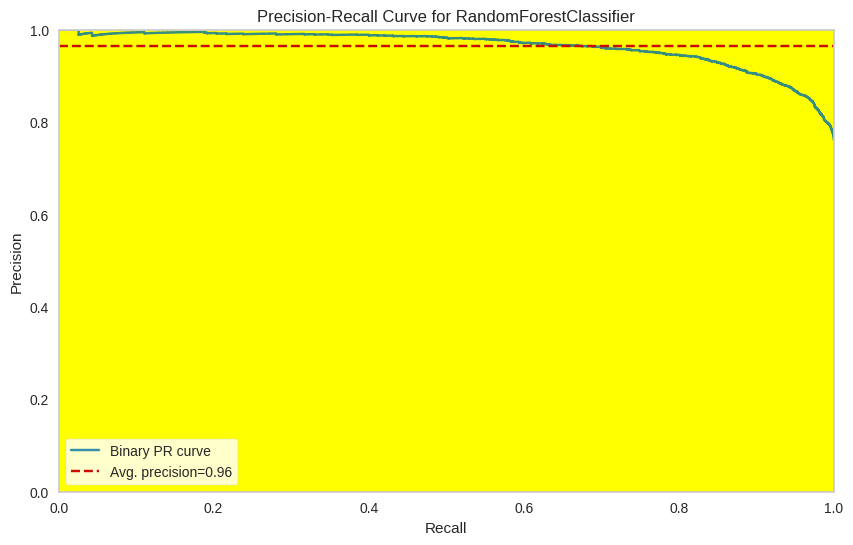

In [ ]:

viz = PrecisionRecallCurve(
 RandomForestClassifier(200, max_depth = 10, random_state = 42, n_jobs = -1, class_weight="balanced"),
 classes=rf.classes_,
 per_class=True,
cmap="Set1"
 )
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('yellow')
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [ ]:
rf_AP_tfidf = viz.score_


# ADABOOST

COUNT VECTORIZER

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators= 500, random_state = 42)
ada.fit(X_train_count, y_train)


AdaBoostClassifier(n_estimators=500, random_state=42)

Ada MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.75      0.62      0.68      1076
           1       0.89      0.94      0.91      3450

    accuracy                           0.86      4526
   macro avg       0.82      0.78      0.80      4526
weighted avg       0.86      0.86      0.86      4526

Train_Set
              precision    recall  f1-score   support

           0       0.82      0.71      0.77      4304
           1       0.91      0.95      0.93     13798

    accuracy                           0.90     18102
   macro avg       0.87      0.83      0.85     18102
weighted avg       0.89      0.90      0.89     18102



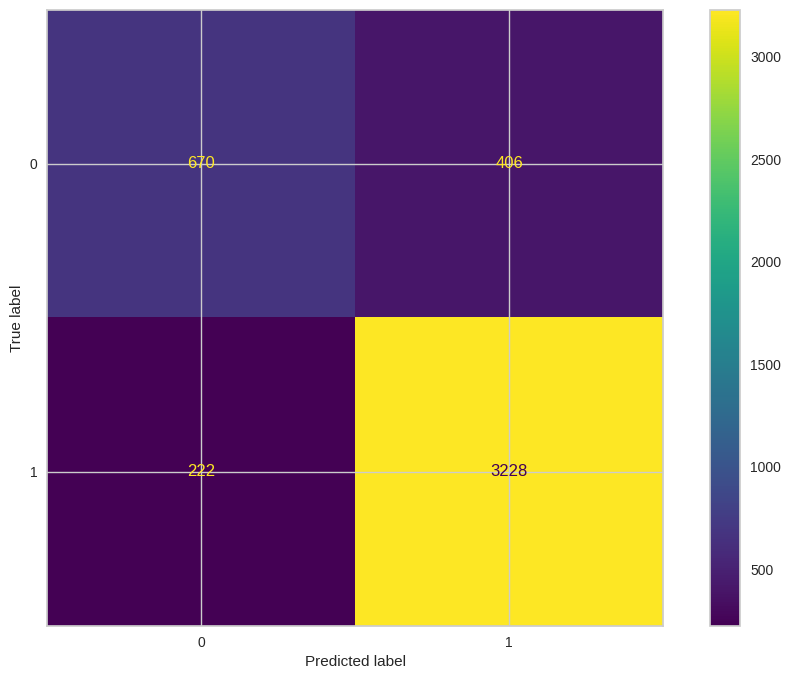

In [ ]:
print("Ada MODEL")
eval(ada, X_train_count, X_test_count)

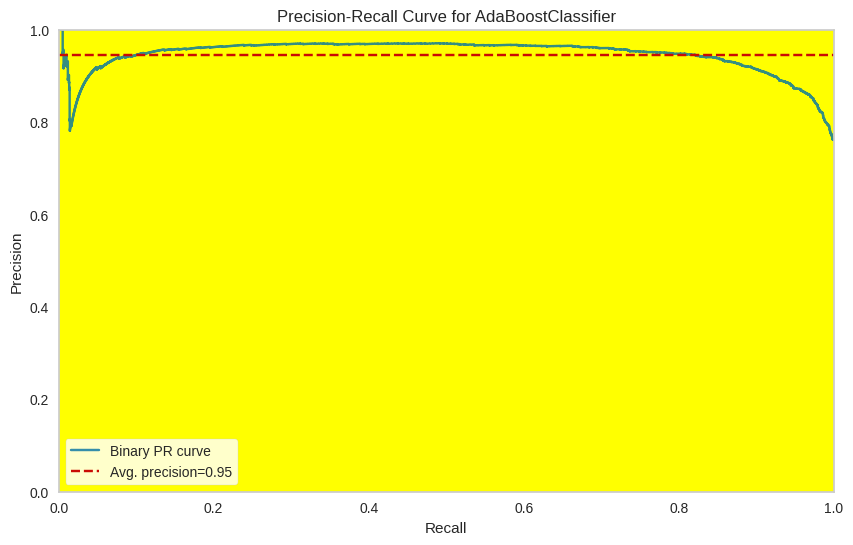

In [ ]:

viz = PrecisionRecallCurve(
 AdaBoostClassifier(n_estimators= 500, random_state = 42),
 classes=ada.classes_,
 per_class=True,
cmap="Set1"
 )
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('yellow')
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [ ]:

ada_AP_count = viz.score_


TF IDF VECTORIZER

In [ ]:
ada = AdaBoostClassifier(n_estimators= 500, random_state = 42)
ada.fit(X_train_tf_idf, y_train)

AdaBoostClassifier(n_estimators=500, random_state=42)

Ada MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.72      0.62      0.67      1076
           1       0.89      0.92      0.90      3450

    accuracy                           0.85      4526
   macro avg       0.80      0.77      0.79      4526
weighted avg       0.85      0.85      0.85      4526

Train_Set
              precision    recall  f1-score   support

           0       0.84      0.75      0.80      4304
           1       0.93      0.96      0.94     13798

    accuracy                           0.91     18102
   macro avg       0.88      0.85      0.87     18102
weighted avg       0.91      0.91      0.91     18102



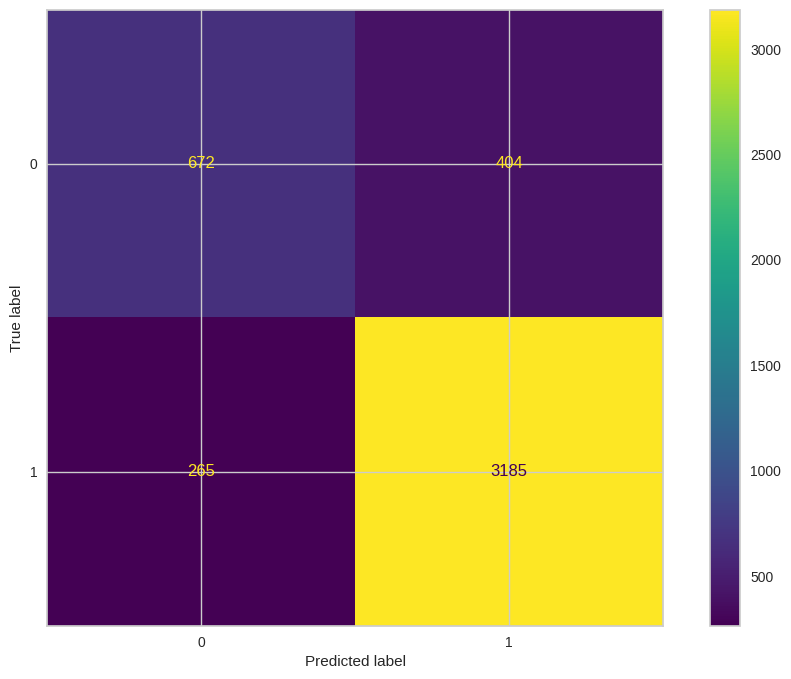

In [ ]:
print("Ada MODEL")
eval(ada, X_train_tf_idf, X_test_tf_idf)

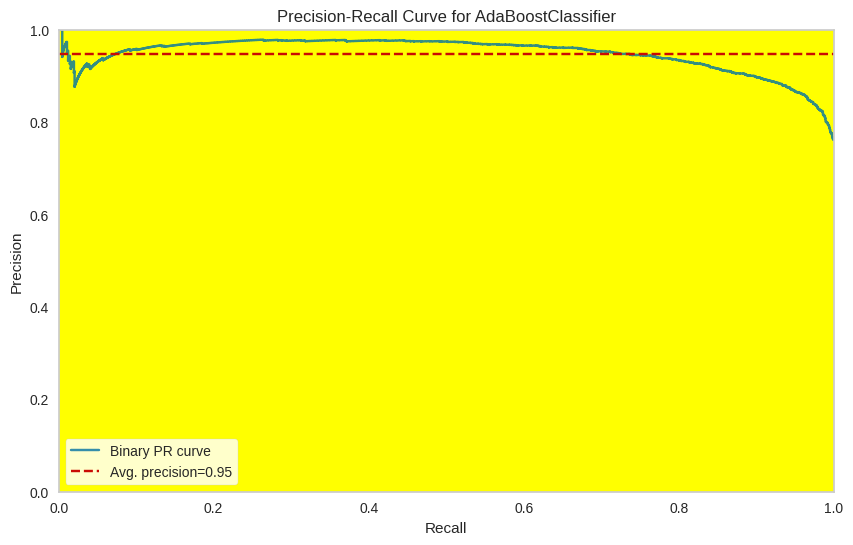

In [ ]:
viz = PrecisionRecallCurve(
 AdaBoostClassifier(n_estimators= 500, random_state = 42),
 classes=ada.classes_,
 per_class=True,
cmap="Set1"
 )
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('yellow')
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [ ]:
ada_AP_tfidf = viz.score_


From the above metrics,

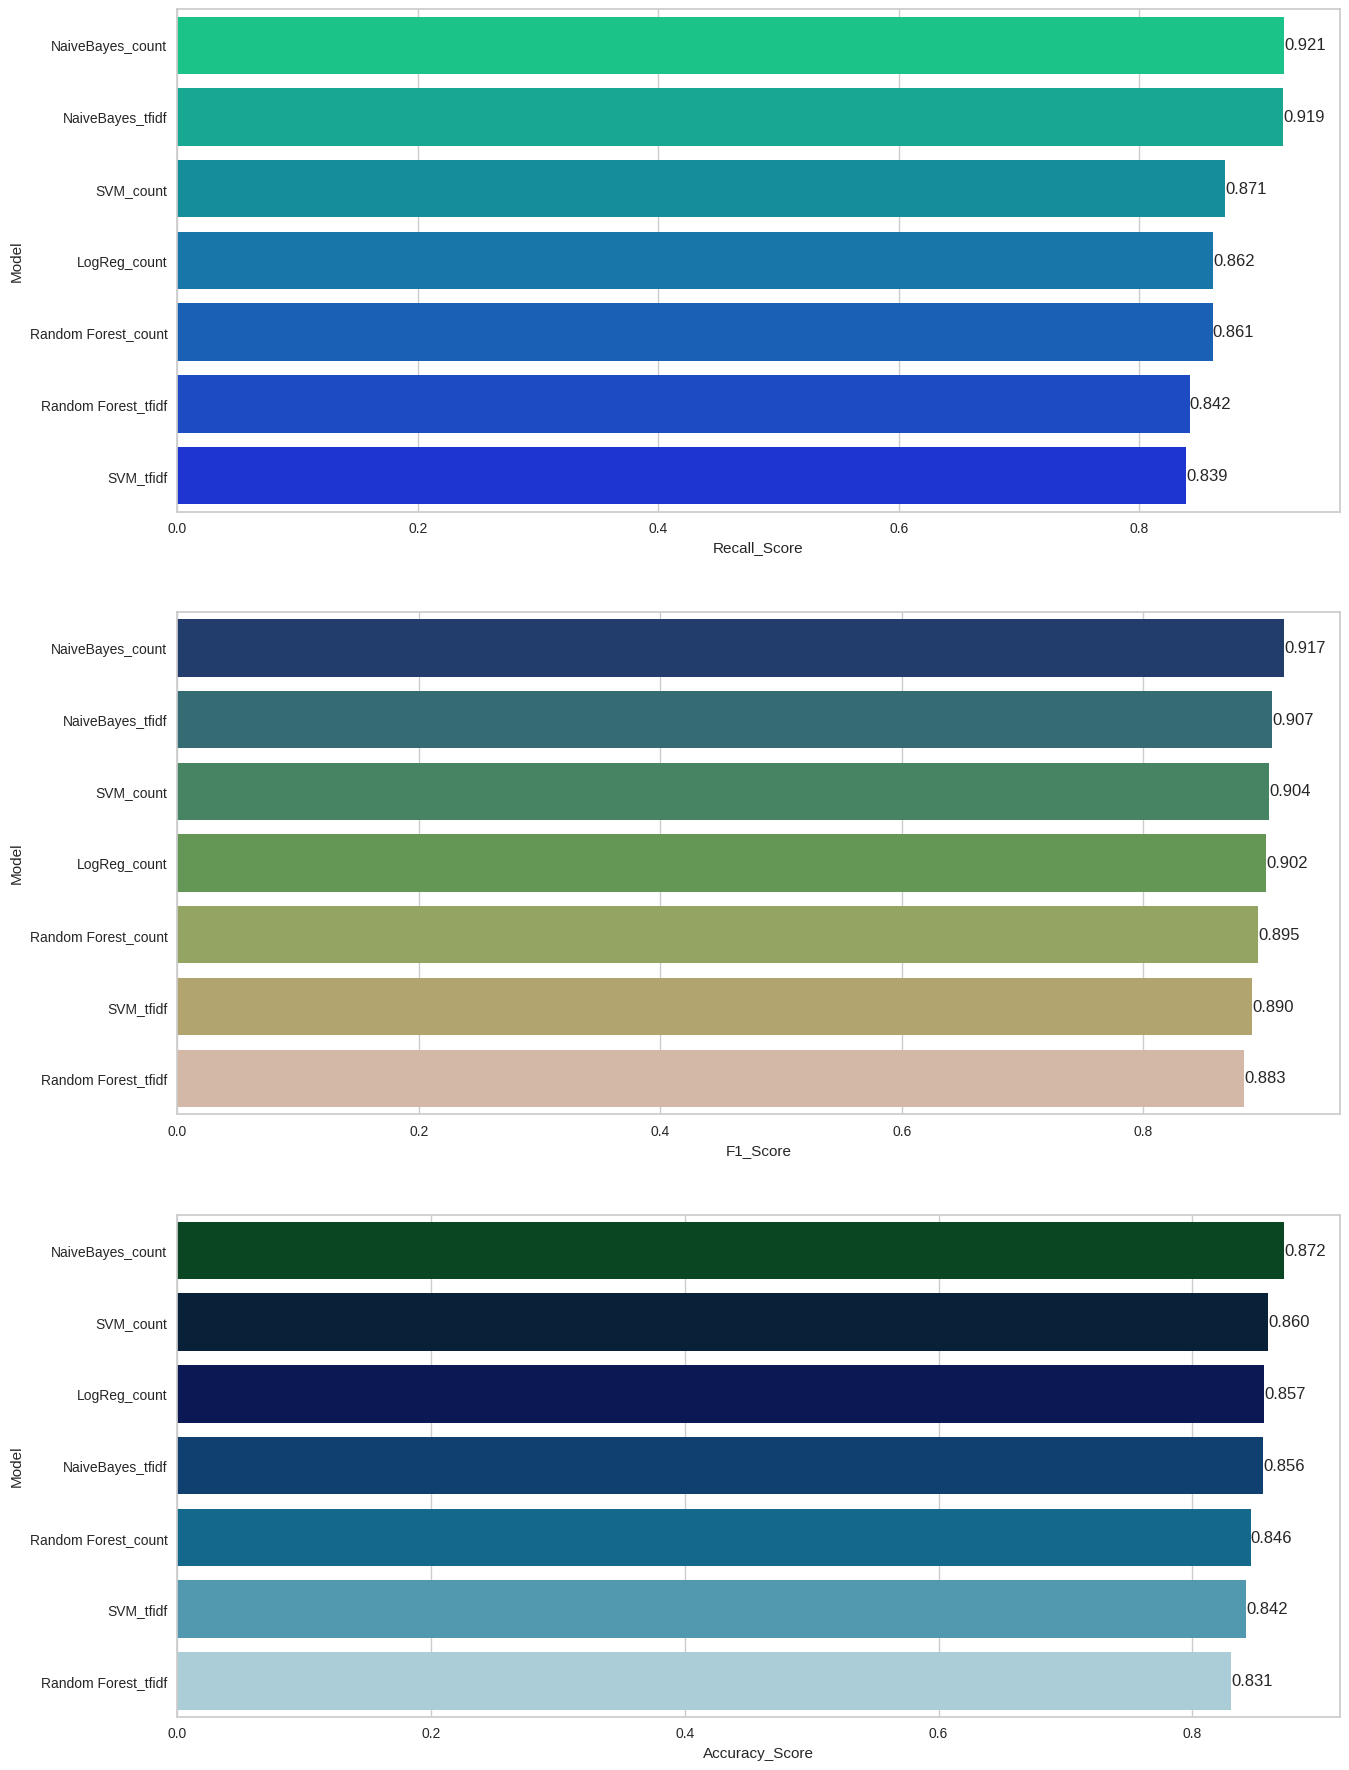

In [ ]:
compare = pd.DataFrame({"Model": ["NaiveBayes_count", "LogReg_count", "SVM_count", "Random Forest_count",
  "NaiveBayes_tfidf", "SVM_tfidf",
 "Random Forest_tfidf"],

"F1_Score": [nb_count_f1, log_count_f1, svc_count_f1,
 rf_count_f1, nb_tfidf_f1,
 svc_tfidf_f1, rf_tfidf_f1],

"Recall_Score": [nb_count_rec, log_count_rec, svc_count_rec,
 rf_count_rec,nb_tfidf_rec, svc_tfidf_rec,
 rf_tfidf_rec],
 "Accuracy_Score": [nb_count_acc, log_count_acc, svc_count_acc,
 rf_count_acc,nb_tfidf_acc, svc_tfidf_acc,
 rf_tfidf_acc],

"Average_Precision_Score": [nb_AP_count, log_AP_count, svc_AP_count, rf_AP_count,
 log_AP_tfidf, svc_AP_tfidf,
 rf_AP_tfidf]})
def labels(ax):

 for p in ax.patches:
  width = p.get_width() # get bar length
  ax.text(width, # set the text at 1 unit right of the bar
  p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
  '{:1.3f}'.format(width), # set variable to display, 2 decimals
  ha = 'left', # horizontal alignment
  va = 'center') # vertical alignment

plt.figure(figsize=(15,30))
plt.subplot(411)
compare = compare.sort_values(by="Recall_Score", ascending=False)
ax=sns.barplot(x="Recall_Score", y="Model", data=compare, palette="winter_r")
labels(ax)
plt.subplot(412)
compare = compare.sort_values(by="F1_Score", ascending=False)
ax=sns.barplot(x="F1_Score", y="Model", data=compare, palette="gist_earth")
labels(ax)


plt.subplot(413)
compare = compare.sort_values(by="Accuracy_Score", ascending=False)
ax=sns.barplot(x="Accuracy_Score", y="Model", data=compare, palette="ocean")
labels(ax)
plt.show();

From the above analysis , Naive Bayes Model with count vectorization is highest in metrics as compared to other models. Hence we can use  Naive Bayes for prediction


In [ ]:
nb = MultinomialNB()
nb.fit(X_train_count, y_train)

MultinomialNB()

In [ ]:
X_train_count

<18102x14836 sparse matrix of type '<class 'numpy.int64'>'
	with 470895 stored elements in Compressed Sparse Row format>

In [ ]:
review1 = "Love this dress"
review2 = "Absolutely wonderful. silky and sexy and comfortable"
review3 = "i initially ordered the petite small (my usual size) but i found this to be outrageously small."
review4 = "I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great comfortable"
review5 = 'This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings.'
review6 = 'I love tracy reese dresses, but this one is not for the very petite.'
review7 = 'I love this dress. i usually get an xs but it runs a little snug in bust so i ordered up a size. very flattering and loose.'
review8 = 'Dress runs small esp where the zipper area runs. i ordered the sp which typically fits me and it was very tight!'
review9 = "if you are at least average height or taller, this may look good on you."
review10 = "sadly will be returning, but i'm sure i will find something to exchange it for!"
review11 = 'Very comfortable, material is good, cut out on sleeves flattering'
reviews = [review1, review2, review3, review4, review5, review6, review7, review8, review9, review10, review11]

In [ ]:

df_pred = pd.DataFrame(reviews,columns={"Reviews":0})
df_pred


,Reviews
0,Love this dress
1,Absolutely wonderful. silky and sexy and comfortable
2,i initially ordered the petite small (my usual size) but i found this to be outrageously small.
3,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great comfortable"
4,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings.
5,"I love tracy reese dresses, but this one is not for the very petite."
6,I love this dress. i usually get an xs but it runs a little snug in bust so i ordered up a size. very flattering and loose.
7,Dress runs small esp where the zipper area runs. i ordered the sp which typically fits me and it was very tight!
8,"if you are at least average height or taller, this may look good on you."
9,"sadly will be returning, but i'm sure i will find something to exchange it for!"


In [ ]:
df_pred["Reviews1"]=df_pred["Reviews"].apply(cleaning_fsa)
df_pred

,Reviews,Reviews1
0,Love this dress,love dress
1,Absolutely wonderful. silky and sexy and comfortable,absolutely wonderful silky sexy comfortable
2,i initially ordered the petite small (my usual size) but i found this to be outrageously small.,initially ordered petite small usual size found outrageously small
3,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great comfortable",love love love jumpsuit fun flirty fabulous every time wear get nothing great comfortable
4,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings.,shirt flattering due adjustable front tie perfect length wear legging
5,"I love tracy reese dresses, but this one is not for the very petite.",love tracy reese dress one petite
6,I love this dress. i usually get an xs but it runs a little snug in bust so i ordered up a size. very flattering and loose.,love dress usually get x run little snug bust ordered size flattering loose
7,Dress runs small esp where the zipper area runs. i ordered the sp which typically fits me and it was very tight!,dress run small esp zipper area run ordered sp typically fit tight
8,"if you are at least average height or taller, this may look good on you.",least average height taller may look good
9,"sadly will be returning, but i'm sure i will find something to exchange it for!",sadly returning im sure find something exchange


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

vectorizer.fit_transform(X_train)
Review=vectorizer.transform(df_pred["Reviews1"])



In [ ]:
y=nb.predict(Review)
df_pred["Predicted Recommendation Label"]=y

In [ ]:
df_pred

,Reviews,Reviews1,Predicted Recommendation Label
0,Love this dress,love dress,1
1,Absolutely wonderful. silky and sexy and comfortable,absolutely wonderful silky sexy comfortable,1
2,i initially ordered the petite small (my usual size) but i found this to be outrageously small.,initially ordered petite small usual size found outrageously small,1
3,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great comfortable",love love love jumpsuit fun flirty fabulous every time wear get nothing great comfortable,1
4,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings.,shirt flattering due adjustable front tie perfect length wear legging,1
5,"I love tracy reese dresses, but this one is not for the very petite.",love tracy reese dress one petite,1
6,I love this dress. i usually get an xs but it runs a little snug in bust so i ordered up a size. very flattering and loose.,love dress usually get x run little snug bust ordered size flattering loose,1
7,Dress runs small esp where the zipper area runs. i ordered the sp which typically fits me and it was very tight!,dress run small esp zipper area run ordered sp typically fit tight,1
8,"if you are at least average height or taller, this may look good on you.",least average height taller may look good,0
9,"sadly will be returning, but i'm sure i will find something to exchange it for!",sadly returning im sure find something exchange,0


Actual one

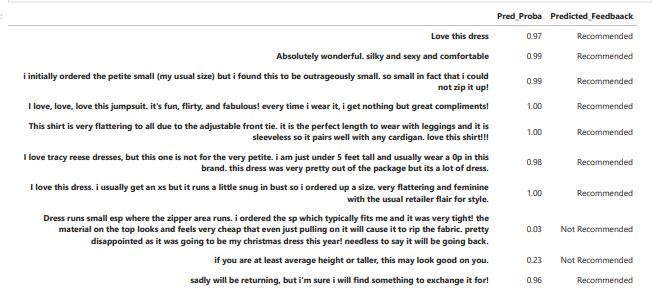